In [ ]:
import os
VENV_PYTHON = os.path.abspath("../.venv/bin/python")
print(VENV_PYTHON)

# FedAvg Data Poisoning

In [31]:
import os
import subprocess
import time
import shutil
import random

folder = "results_fedavg_data"


def run_experiment(attack_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for a in attack_list:
        log_folder = os.path.join(folder, f"logs_a{a}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {a} alpha ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", "10",
            "--type","data",
            "--strategy", "fedavg",
            "--attackers", str(a)
        ]
        server_log_path = os.path.join(log_folder, f"server_{a}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        attacker_count = int(10 * a)
        attacker_ids = set(random.sample(range(10), attacker_count))

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
            ]
            if cid in attacker_ids:
                print(f"Attacker")
                client_cmd+=["--type","data"]

            client_log_path = os.path.join(log_folder, f"client_{cid}_a{a}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {a} alpha ===\n")

attack_list = [0, 0.25, 0.5]
run_experiment(attack_list)

Deleted existing folder: results_fedavg_data

=== Running test for 0 alpha ===
Started server (PID 48017)
Started client 0 (PID 48066)
Started client 1 (PID 48067)
Started client 2 (PID 48068)
Started client 3 (PID 48080)
Started client 4 (PID 48092)
Started client 5 (PID 48104)
Started client 6 (PID 48112)
Started client 7 (PID 48134)
Started client 8 (PID 48146)
Started client 9 (PID 48147)
=== Finished test for 0 alpha ===


=== Running test for 0.25 alpha ===
Started server (PID 50314)
Started client 0 (PID 50363)
Started client 1 (PID 50364)
Attacker
Started client 2 (PID 50365)
Started client 3 (PID 50377)
Started client 4 (PID 50389)
Started client 5 (PID 50401)
Started client 6 (PID 50413)
Started client 7 (PID 50414)
Attacker
Started client 8 (PID 50426)
Started client 9 (PID 50442)
=== Finished test for 0.25 alpha ===


=== Running test for 0.5 alpha ===
Started server (PID 52607)
Attacker
Started client 0 (PID 52650)
Started client 1 (PID 52651)
Started client 2 (PID 52652)


In [33]:
! python vizualizer.py --folder results_fedavg_data --param_index 3 --print_table

+--------+----------+------+-----------+--------------------+--------------------+
| client | strategy | type | attackers |      accuracy      |        loss        |
+--------+----------+------+-----------+--------------------+--------------------+
|   10   |  fedavg  | data |    0.0    | 0.8808829654310704 | 0.3359635559731054 |
|   10   |  fedavg  | data |    0.25   | 0.875551853394419  | 0.3499920205442372 |
|   10   |  fedavg  | data |    0.5    | 0.868554768846314  | 0.3664559993283146 |
+--------+----------+------+-----------+--------------------+--------------------+
Saved metric curve plots to results_fedavg_data/plot1.png
Saved final accuracy vs param plot to results_fedavg_data/plot2.png


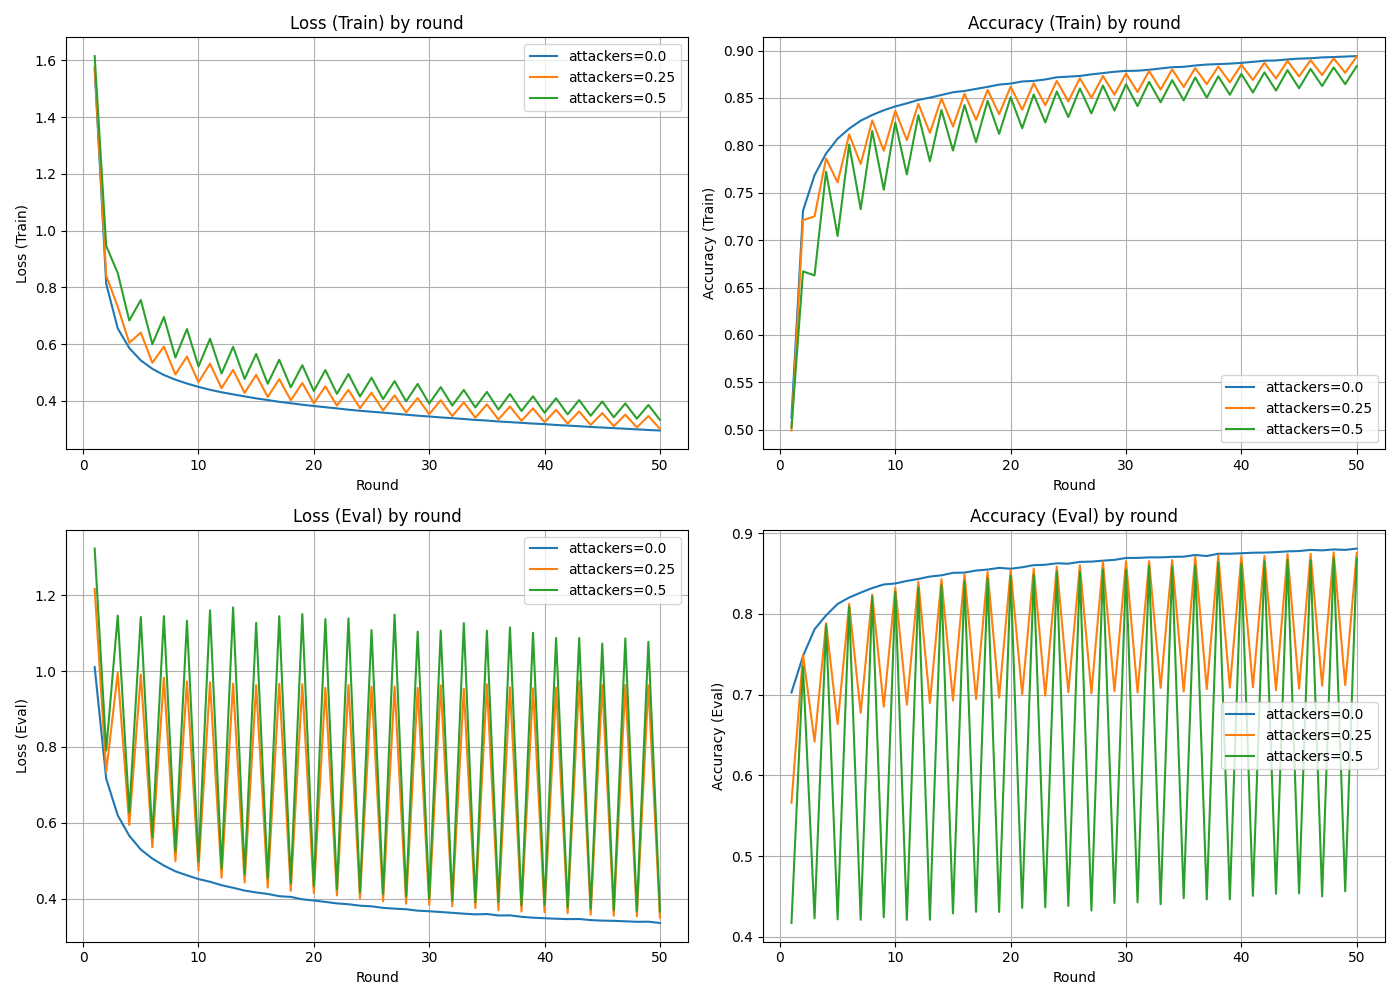

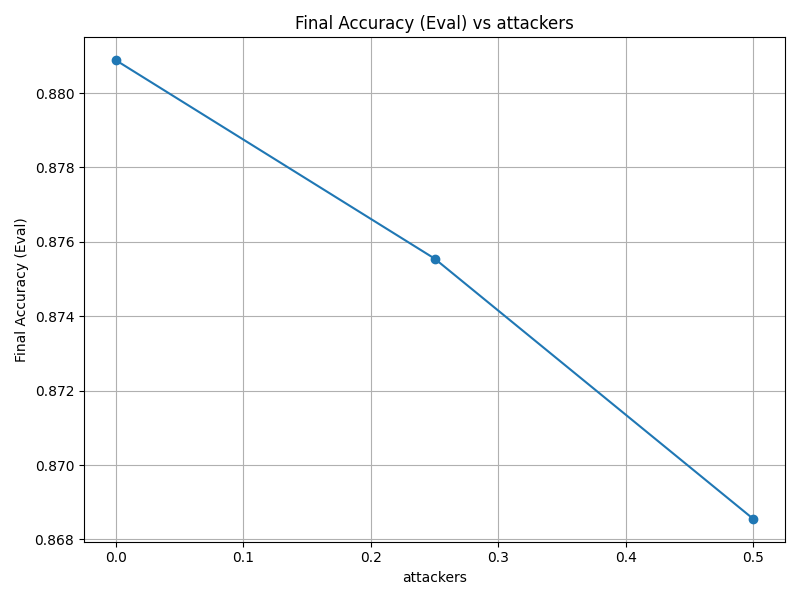

In [34]:
from IPython.display import Image, display

plot1_path = 'results_fedavg_data/plot1.png'
plot2_path = 'results_fedavg_data/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# FedAvg Model Poisoning

In [35]:
import os
import subprocess
import time
import shutil
import random

folder = "results_fedavg_model"


def run_experiment(attack_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for a in attack_list:
        log_folder = os.path.join(folder, f"logs_a{a}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {a} attackers ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", "10",
            "--type","model",
            "--strategy", "fedavg",
            "--attackers", str(a)
        ]
        server_log_path = os.path.join(log_folder, f"server_{a}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        attacker_count = int(10 * a)
        attacker_ids = set(random.sample(range(10), attacker_count))

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
            ]
            if cid in attacker_ids:
                print(f"Attacker")
                client_cmd+=["--type","model"]

            client_log_path = os.path.join(log_folder, f"client_{cid}_a{a}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {a} attackers ===\n")

attack_list = [0, 0.25, 0.5]
run_experiment(attack_list)


=== Running test for 0 attackers ===
Started server (PID 56156)
Started client 0 (PID 56199)
Started client 1 (PID 56206)
Started client 2 (PID 56208)
Started client 3 (PID 56220)
Started client 4 (PID 56232)
Started client 5 (PID 56244)
Started client 6 (PID 56256)
Started client 7 (PID 56269)
Started client 8 (PID 56270)
Started client 9 (PID 56283)
=== Finished test for 0 attackers ===


=== Running test for 0.25 attackers ===
Started server (PID 58494)
Attacker
Started client 0 (PID 58537)
Started client 1 (PID 58538)
Started client 2 (PID 58539)
Started client 3 (PID 58551)
Started client 4 (PID 58563)
Started client 5 (PID 58576)
Started client 6 (PID 58593)
Started client 7 (PID 58605)
Attacker
Started client 8 (PID 58617)
Started client 9 (PID 58618)
=== Finished test for 0.25 attackers ===


=== Running test for 0.5 attackers ===
Started server (PID 60839)
Attacker
Started client 0 (PID 60865)
Attacker
Started client 1 (PID 60886)
Started client 2 (PID 60887)
Started client 3

In [38]:
! python vizualizer.py --folder results_fedavg_model --param_index 3 --print_table

+--------+----------+-------+-----------+---------------------+---------------------+
| client | strategy |  type | attackers |       accuracy      |         loss        |
+--------+----------+-------+-----------+---------------------+---------------------+
|   10   |  fedavg  | model |    0.0    |  0.8793002915451895 | 0.33564276126015935 |
|   10   |  fedavg  | model |    0.25   | 0.10412328196584757 |         nan         |
|   10   |  fedavg  | model |    0.5    | 0.10195751770095793 |         nan         |
+--------+----------+-------+-----------+---------------------+---------------------+
Saved metric curve plots to results_fedavg_model/plot1.png
Saved final accuracy vs param plot to results_fedavg_model/plot2.png


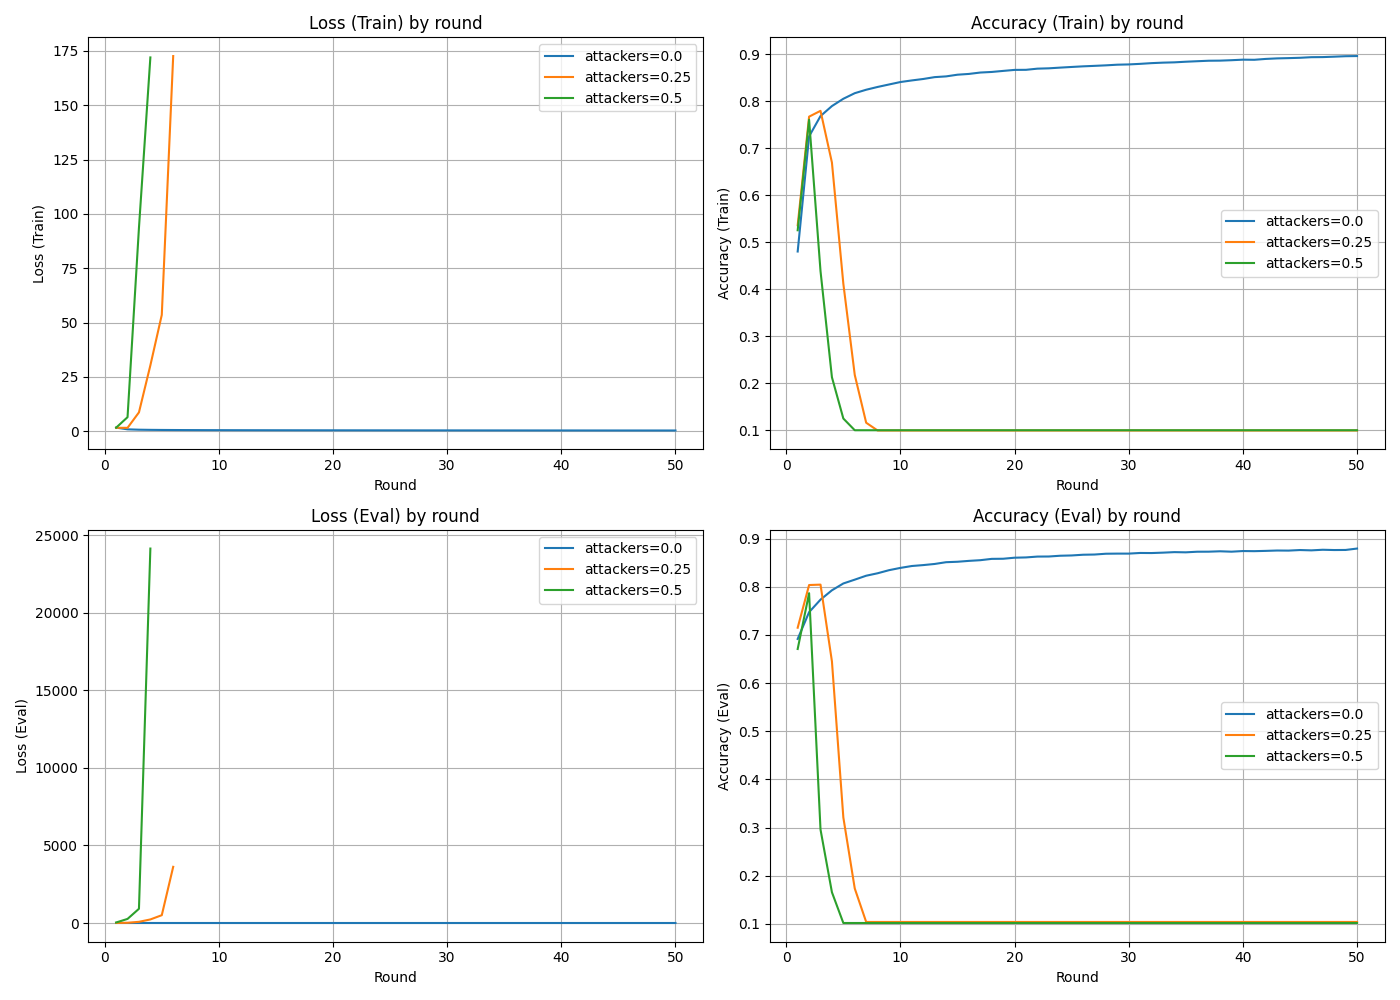

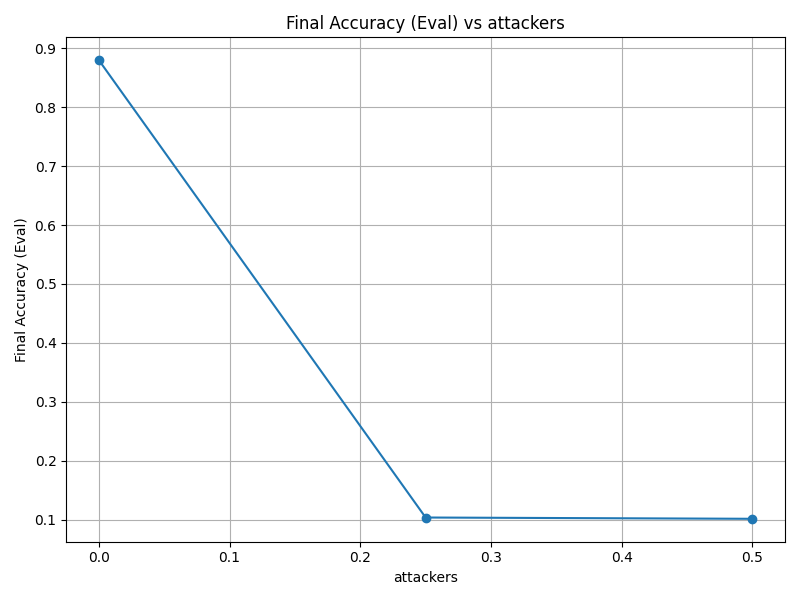

In [39]:
from IPython.display import Image, display

plot1_path = 'results_fedavg_model/plot1.png'
plot2_path = 'results_fedavg_model/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# FedMedian data poisoning

In [6]:
import os
import subprocess
import time
import shutil
import random

folder = "results_fedmedian_data"


def run_experiment(attack_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for a in attack_list:
        log_folder = os.path.join(folder, f"logs_a{a}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {a} attackers ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", "10",
            "--type","data",
            "--strategy", "fedmedian",
            "--attackers", str(a)
        ]
        server_log_path = os.path.join(log_folder, f"server_{a}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        attacker_count = int(10 * a)
        attacker_ids = set(random.sample(range(10), attacker_count))

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
            ]
            if cid in attacker_ids:
                print(f"Attacker")
                client_cmd+=["--type","data"]

            client_log_path = os.path.join(log_folder, f"client_{cid}_a{a}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {a} attackers ===\n")

attack_list = [0, 0.25, 0.5]
run_experiment(attack_list)

Deleted existing folder: results_fedmedian_data

=== Running test for 0 attackers ===
Started server (PID 9217)
Started client 0 (PID 9246)
Started client 1 (PID 9247)
Started client 2 (PID 9248)
Started client 3 (PID 9249)
Started client 4 (PID 9281)
Started client 5 (PID 9293)
Started client 6 (PID 9305)
Started client 7 (PID 9306)
Started client 8 (PID 9318)
Started client 9 (PID 9336)
=== Finished test for 0 attackers ===


=== Running test for 0.25 attackers ===
Started server (PID 11740)
Started client 0 (PID 11758)
Started client 1 (PID 11759)
Started client 2 (PID 11760)
Started client 3 (PID 11769)
Attacker
Started client 4 (PID 11784)
Started client 5 (PID 11796)
Attacker
Started client 6 (PID 11808)
Started client 7 (PID 11809)
Started client 8 (PID 11821)
Started client 9 (PID 11853)
=== Finished test for 0.25 attackers ===


=== Running test for 0.5 attackers ===
Started server (PID 14216)
Attacker
Started client 0 (PID 14240)
Attacker
Started client 1 (PID 14241)
Attacker

In [7]:
! python vizualizer.py --folder results_fedmedian_data --param_index 3 --print_table

+--------+-----------+------+-----------+--------------------+---------------------+
| client |  strategy | type | attackers |      accuracy      |         loss        |
+--------+-----------+------+-----------+--------------------+---------------------+
|   10   | fedmedian | data |    0.0    | 0.8785506039150354 |  0.3335039842357143 |
|   10   | fedmedian | data |    0.25   | 0.8757184506455643 |  0.3484866118242422 |
|   10   | fedmedian | data |    0.5    | 0.8758850478967097 | 0.34757757644164766 |
+--------+-----------+------+-----------+--------------------+---------------------+
Saved metric curve plots to results_fedmedian_data/plot1.png
Saved final accuracy vs param plot to results_fedmedian_data/plot2.png


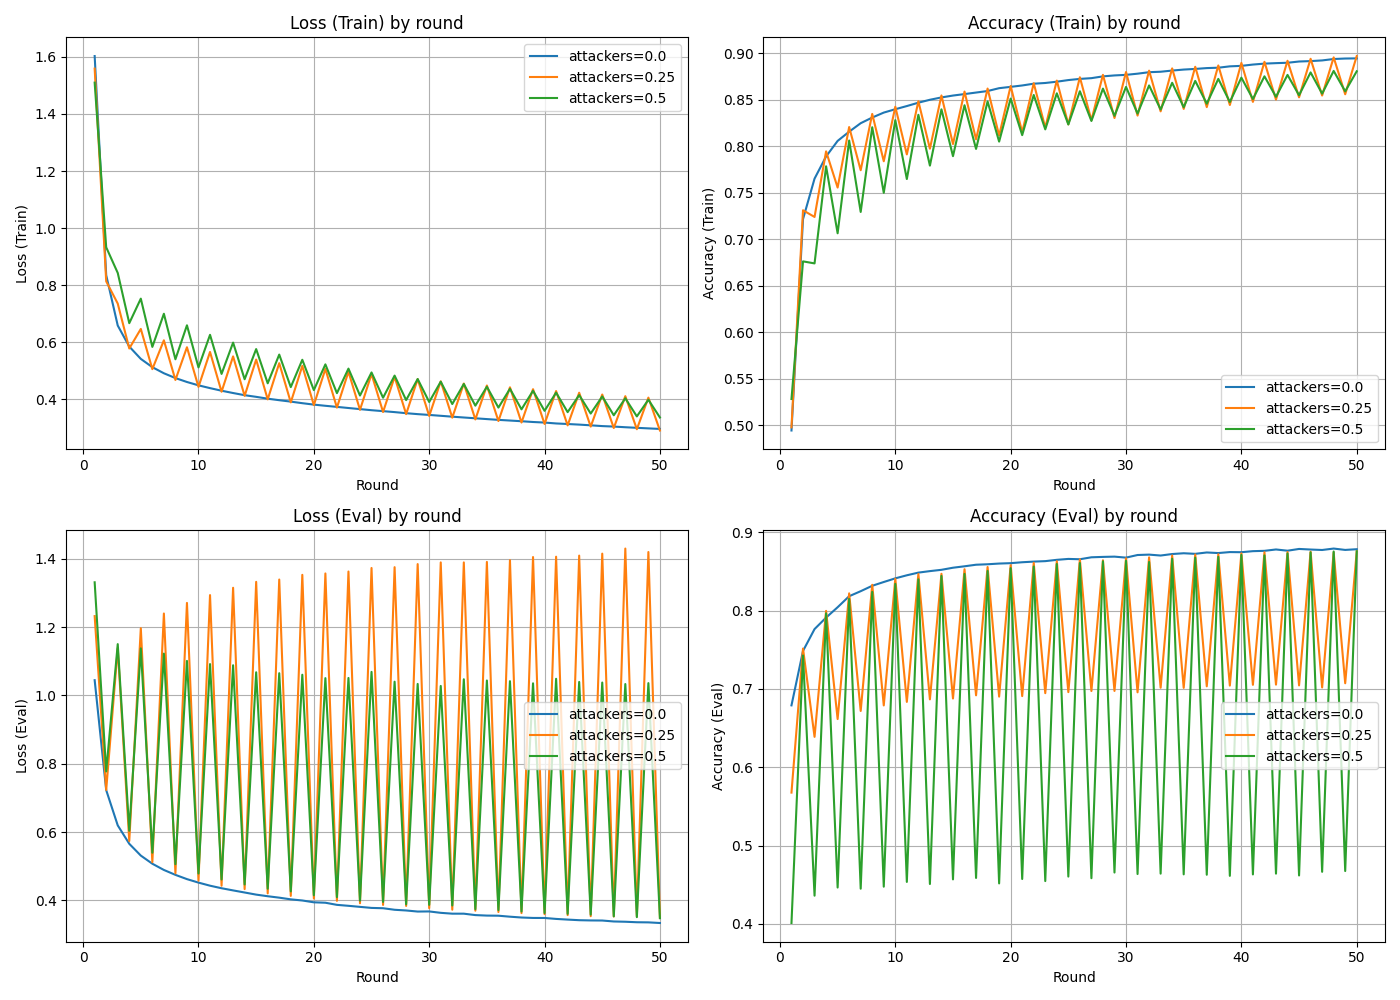

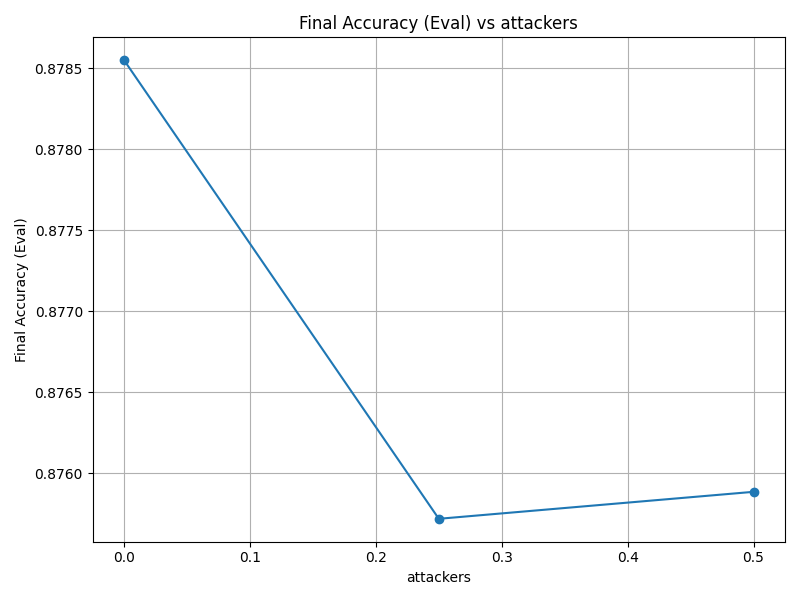

In [8]:
from IPython.display import Image, display

plot1_path = 'results_fedmedian_data/plot1.png'
plot2_path = 'results_fedmedian_data/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# FedMedian Model Poisoning

In [3]:
import os
import subprocess
import time
import shutil
import random

folder = "results_fedmedian_model"


def run_experiment(attack_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for a in attack_list:
        log_folder = os.path.join(folder, f"logs_a{a}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {a} attackers ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", "10",
            "--type","model",
            "--strategy", "fedmedian",
            "--attackers", str(a)
        ]
        server_log_path = os.path.join(log_folder, f"server_{a}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        attacker_count = int(10 * a)
        attacker_ids = set(random.sample(range(10), attacker_count))

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
            ]
            if cid in attacker_ids:
                print(f"Attacker")
                client_cmd+=["--type","model"]

            client_log_path = os.path.join(log_folder, f"client_{cid}_a{a}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {a} attackers ===\n")

attack_list = [0, 0.25, 0.5]
run_experiment(attack_list)

Deleted existing folder: results_fedmedian_model

=== Running test for 0 attackers ===
Started server (PID 1735)
Started client 0 (PID 1759)
Started client 1 (PID 1760)
Started client 2 (PID 1761)
Started client 3 (PID 1762)
Started client 4 (PID 1774)
Started client 5 (PID 1786)
Started client 6 (PID 1798)
Started client 7 (PID 1810)
Started client 8 (PID 1816)
Started client 9 (PID 1828)
=== Finished test for 0 attackers ===


=== Running test for 0.25 attackers ===
Started server (PID 4112)
Attacker
Started client 0 (PID 4130)
Started client 1 (PID 4136)
Started client 2 (PID 4137)
Started client 3 (PID 4138)
Started client 4 (PID 4156)
Attacker
Started client 5 (PID 4168)
Started client 6 (PID 4189)
Started client 7 (PID 4201)
Started client 8 (PID 4213)
Started client 9 (PID 4225)
=== Finished test for 0.25 attackers ===


=== Running test for 0.5 attackers ===
Started server (PID 6556)
Attacker
Started client 0 (PID 6574)
Attacker
Started client 1 (PID 6580)
Attacker
Started clie

In [4]:
! python vizualizer.py --folder results_fedmedian_model --param_index 3 --print_table

+--------+-----------+-------+-----------+--------------------+---------------------+
| client |  strategy |  type | attackers |      accuracy      |         loss        |
+--------+-----------+-------+-----------+--------------------+---------------------+
|   10   | fedmedian | model |    0.0    | 0.8765514369012911 | 0.34164642181211785 |
|   10   | fedmedian | model |    0.25   | 0.8741357767596835 |  0.3499833606968617 |
|   10   | fedmedian | model |    0.5    | 0.1043731778425656 |         nan         |
+--------+-----------+-------+-----------+--------------------+---------------------+
Saved metric curve plots to results_fedmedian_model/plot1.png
Saved final accuracy vs param plot to results_fedmedian_model/plot2.png


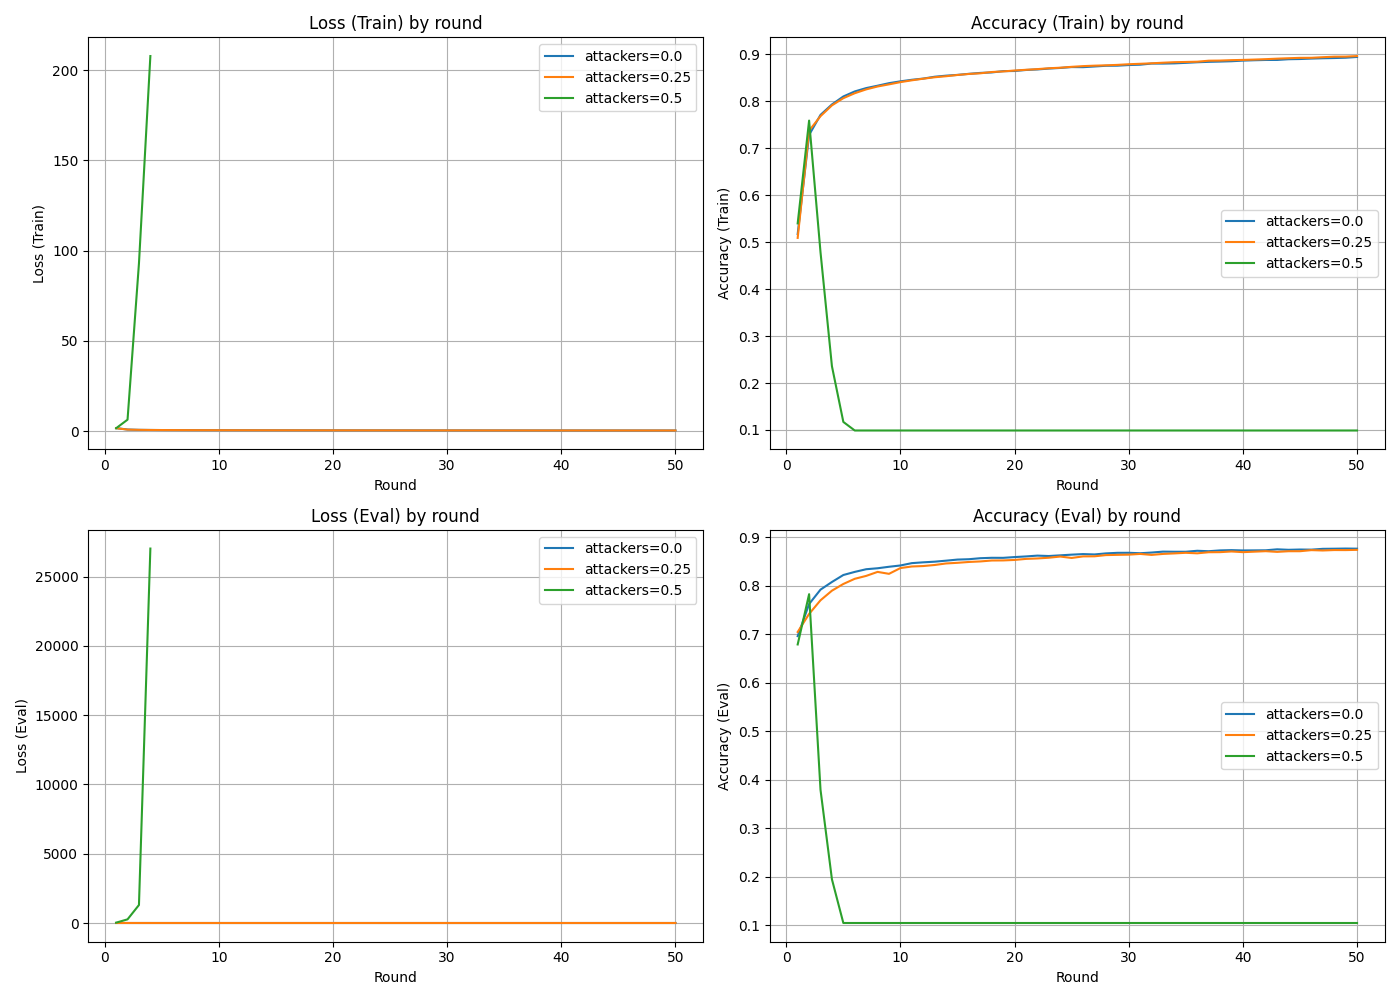

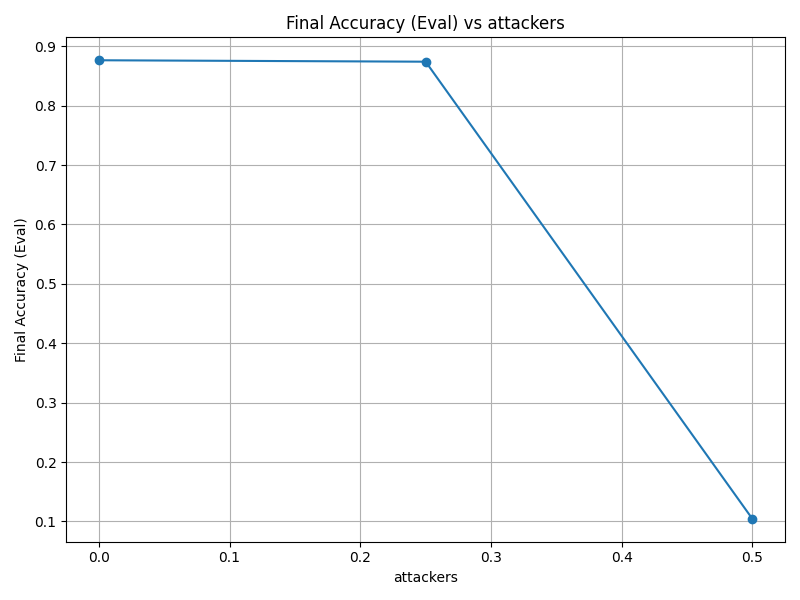

In [5]:
from IPython.display import Image, display

plot1_path = 'results_fedmedian_model/plot1.png'
plot2_path = 'results_fedmedian_model/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# Krum data poisoning

In [15]:
import os
import subprocess
import time
import shutil
import random

folder = "results_krum_data"


def run_experiment(attack_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for a in attack_list:
        log_folder = os.path.join(folder, f"logs_a{a}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {a} attackers ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", "10",
            "--type","data",
            "--strategy", "krum",
            "--attackers", str(a)
        ]
        server_log_path = os.path.join(log_folder, f"server_{a}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        attacker_count = int(10 * a)
        attacker_ids = set(random.sample(range(10), attacker_count))

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
            ]
            if cid in attacker_ids:
                print(f"Attacker")
                client_cmd+=["--type","data"]

            client_log_path = os.path.join(log_folder, f"client_{cid}_a{a}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {a} attackers ===\n")

attack_list = [0, 0.25, 0.5]
run_experiment(attack_list)

Deleted existing folder: results_krum_data

=== Running test for 0 attackers ===
Started server (PID 30539)
Started client 0 (PID 30557)
Started client 1 (PID 30558)
Started client 2 (PID 30559)
Started client 3 (PID 30577)
Started client 4 (PID 30578)
Started client 5 (PID 30590)
Started client 6 (PID 30607)
Started client 7 (PID 30619)
Started client 8 (PID 30631)
Started client 9 (PID 30643)
=== Finished test for 0 attackers ===


=== Running test for 0.25 attackers ===
Started server (PID 32925)
Started client 0 (PID 32954)
Started client 1 (PID 32955)
Attacker
Started client 2 (PID 32956)
Started client 3 (PID 32968)
Attacker
Started client 4 (PID 32969)
Started client 5 (PID 33001)
Started client 6 (PID 33013)
Started client 7 (PID 33031)
Started client 8 (PID 33043)
Started client 9 (PID 33044)
=== Finished test for 0.25 attackers ===


=== Running test for 0.5 attackers ===
Started server (PID 35384)
Started client 0 (PID 35402)
Started client 1 (PID 35408)
Attacker
Started cli

In [1]:
! python vizualizer.py --folder results_krum_data --param_index 3 --print_table

+--------+----------+------+-----------+--------------------+---------------------+
| client | strategy | type | attackers |      accuracy      |         loss        |
+--------+----------+------+-----------+--------------------+---------------------+
|   10   |   krum   | data |    0.0    | 0.853561016243232  | 0.46670242616505686 |
|   10   |   krum   | data |    0.25   | 0.8224906289046231 |  0.5485377814436098 |
|   10   |   krum   | data |    0.5    |  0.85847563515202  |  0.4284957841206272 |
+--------+----------+------+-----------+--------------------+---------------------+
Saved metric curve plots to results_krum_data/plot1.png
Saved final accuracy vs param plot to results_krum_data/plot2.png


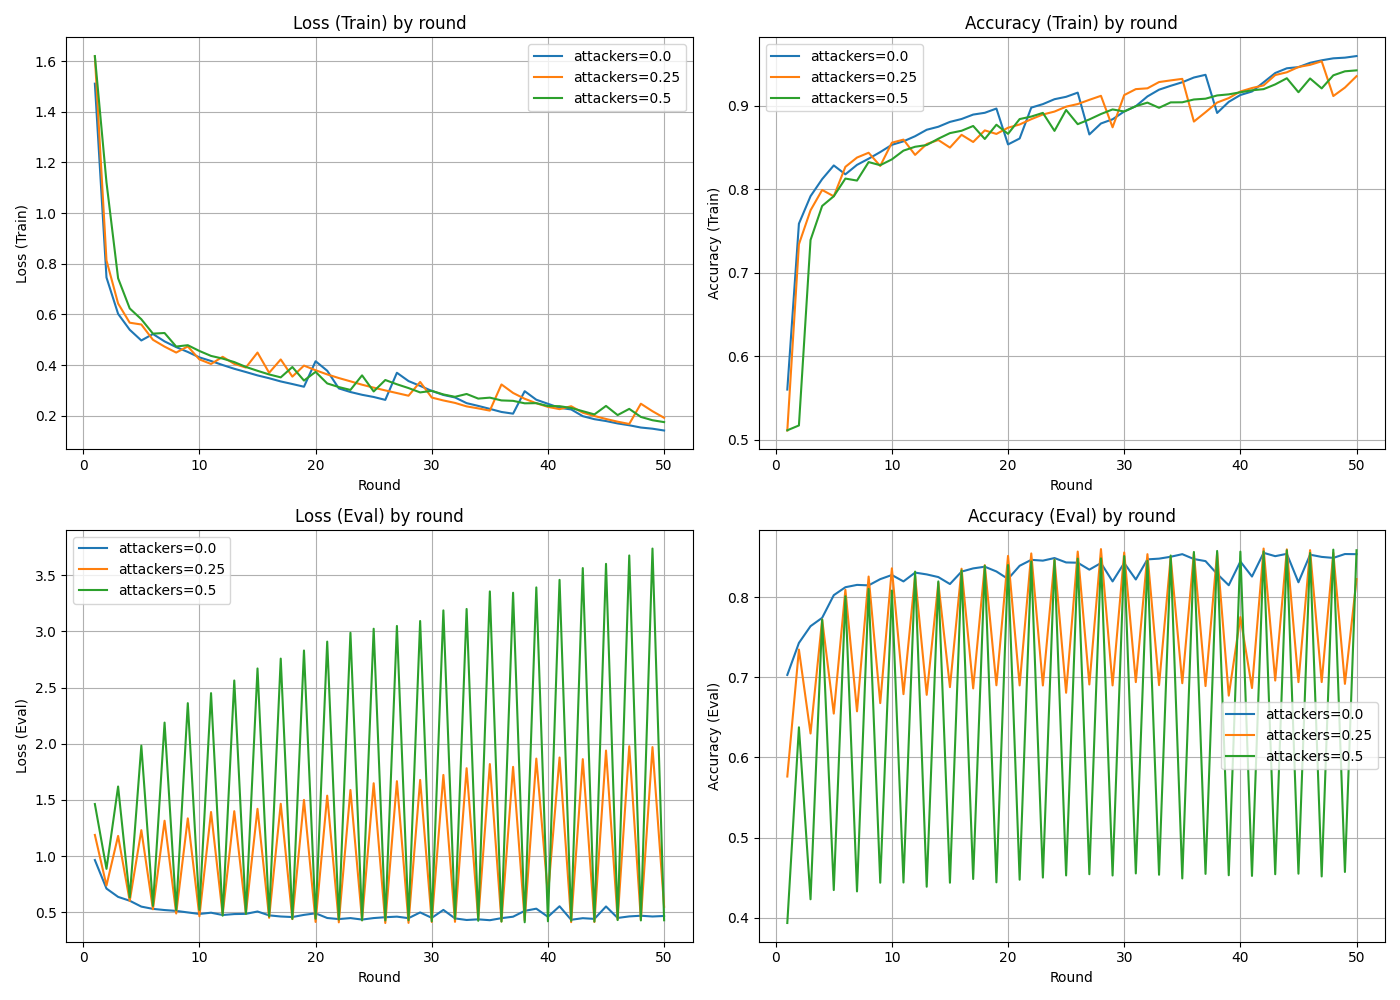

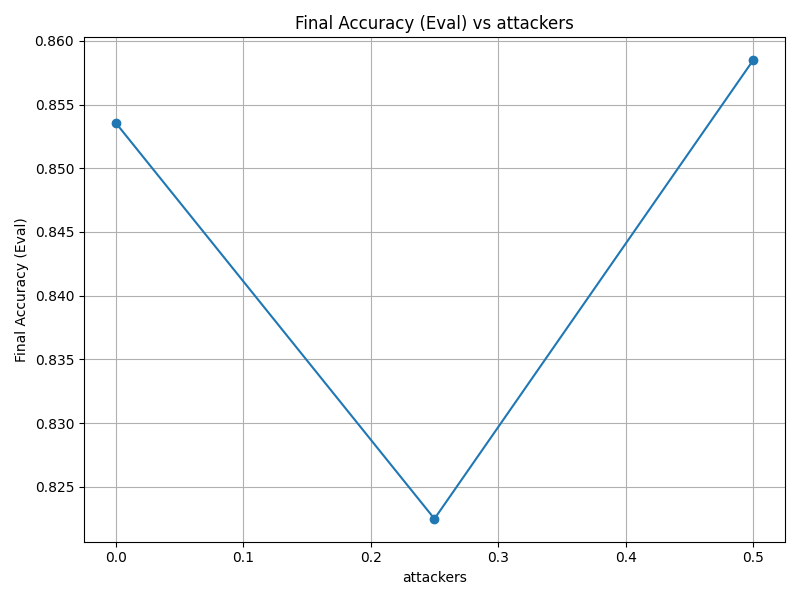

In [2]:
from IPython.display import Image, display

plot1_path = 'results_krum_data/plot1.png'
plot2_path = 'results_krum_data/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# Krum model poisoning

In [12]:
import os
import subprocess
import time
import shutil
import random

folder = "results_krum_model"


def run_experiment(attack_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for a in attack_list:
        log_folder = os.path.join(folder, f"logs_a{a}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {a} attackers ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", "10",
            "--type","model",
            "--strategy", "krum",
            "--attackers", str(a)
        ]
        server_log_path = os.path.join(log_folder, f"server_{a}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        attacker_count = int(10 * a)
        attacker_ids = set(random.sample(range(10), attacker_count))

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
            ]
            if cid in attacker_ids:
                print(f"Attacker")
                client_cmd+=["--type","model"]

            client_log_path = os.path.join(log_folder, f"client_{cid}_a{a}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {a} attackers ===\n")

attack_list = [0, 0.25, 0.5]
run_experiment(attack_list)

Deleted existing folder: results_krum_model

=== Running test for 0 attackers ===
Started server (PID 15238)
Started client 0 (PID 15261)
Started client 1 (PID 15262)
Started client 2 (PID 15263)
Started client 3 (PID 15299)
Started client 4 (PID 15302)
Started client 5 (PID 15314)
Started client 6 (PID 15326)
Started client 7 (PID 15338)
Started client 8 (PID 15350)
Started client 9 (PID 15362)
=== Finished test for 0 attackers ===


=== Running test for 0.25 attackers ===
Started server (PID 17748)
Attacker
Started client 0 (PID 17766)
Started client 1 (PID 17767)
Started client 2 (PID 17779)
Started client 3 (PID 17780)
Attacker
Started client 4 (PID 17792)
Started client 5 (PID 17804)
Started client 6 (PID 17805)
Started client 7 (PID 17817)
Started client 8 (PID 17838)
Started client 9 (PID 17850)
=== Finished test for 0.25 attackers ===


=== Running test for 0.5 attackers ===
Started server (PID 20314)
Attacker
Started client 0 (PID 20337)
Attacker
Started client 1 (PID 20338)
A

In [21]:
! python vizualizer.py --folder results_krum_model --param_index 4 --print_table

+-------+--------+----------+-------+-----------+--------------------+---------------------+
| alpha | client | strategy |  type | attackers |      accuracy      |         loss        |
+-------+--------+----------+-------+-----------+--------------------+---------------------+
|  10.0 |   10   |   krum   | model |    0.0    | 0.8433985839233653 |  0.5522112813655261 |
|  10.0 |   10   |   krum   | model |    0.25   | 0.8438150770512286 | 0.47681126752678227 |
|  10.0 |   10   |   krum   | model |    0.5    | 0.8464806330695543 | 0.48817371000651766 |
+-------+--------+----------+-------+-----------+--------------------+---------------------+
Saved metric curve plots to results_krum_model/plot1.png
Saved final accuracy vs param plot to results_krum_model/plot2.png


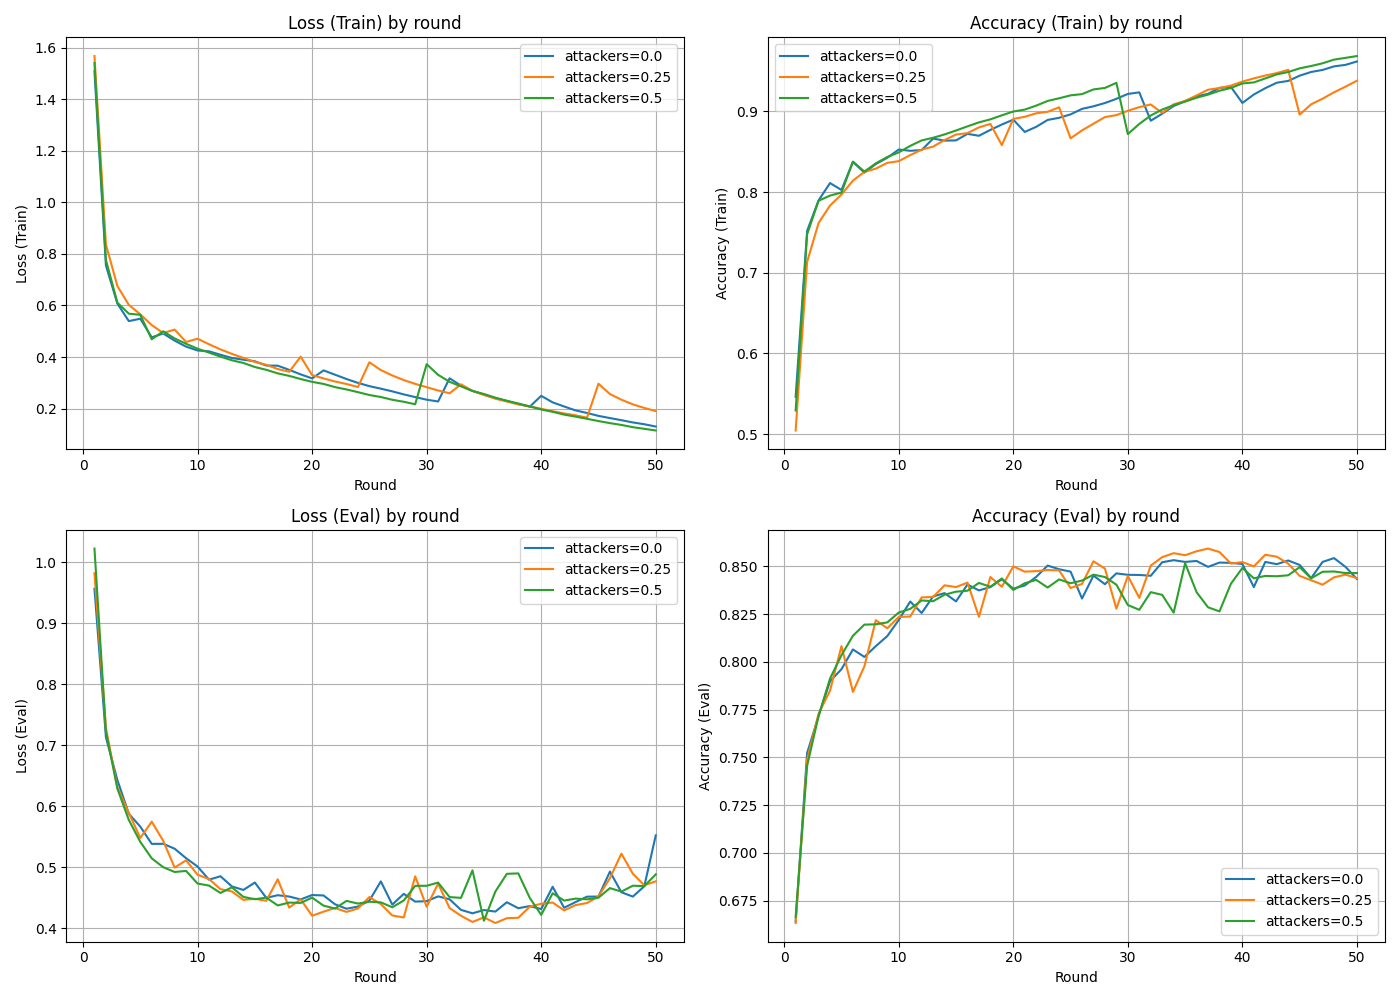

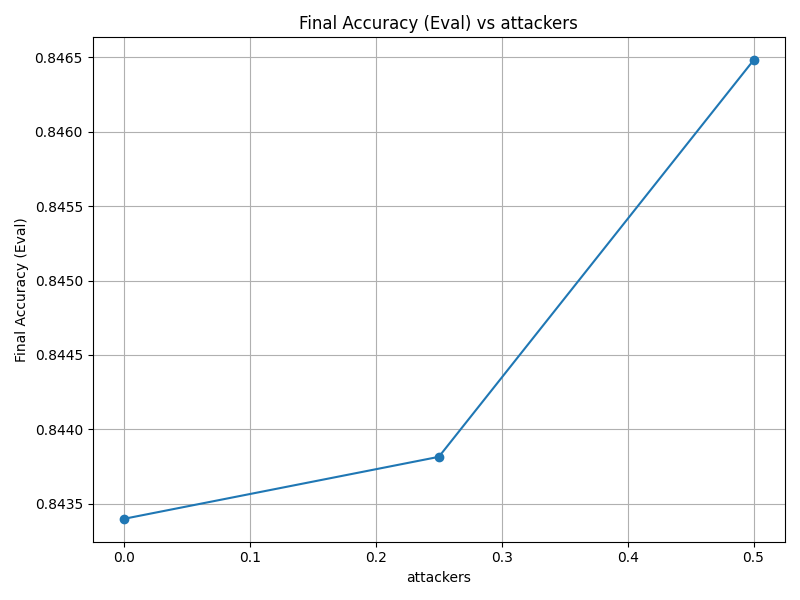

In [22]:
from IPython.display import Image, display

plot1_path = 'results_krum_model/plot1.png'
plot2_path = 'results_krum_model/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# Data poisoning comapare for 25% attackers

In [15]:
import os
import subprocess
import time
import shutil
import random

folder = "results_data_compare"


def run_experiment(strat_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for strat in strat_list:
        log_folder = os.path.join(folder, f"logs_{strat}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for strat ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", "10",
            "--type","data",
            "--strategy", strat,
            "--attackers", "0.25"
        ]
        server_log_path = os.path.join(log_folder, f"server_{strat}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        attacker_count = int(10 * 0.25)
        attacker_ids = set(random.sample(range(10), attacker_count))

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
            ]
            if cid in attacker_ids:
                print(f"Attacker")
                client_cmd+=["--type","data"]

            client_log_path = os.path.join(log_folder, f"client_{cid}_{strat}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {strat} ===\n")

strat_list = ["fedavg","fedmedian","krum"]
run_experiment(strat_list)

Deleted existing folder: results_data_compare

=== Running test for strat ===
Started server (PID 22868)
Attacker
Started client 0 (PID 22886)
Started client 1 (PID 22892)
Started client 2 (PID 22893)
Started client 3 (PID 22905)
Started client 4 (PID 22912)
Started client 5 (PID 22926)
Started client 6 (PID 22956)
Started client 7 (PID 22957)
Started client 8 (PID 22969)
Attacker
Started client 9 (PID 22981)
=== Finished test for fedavg ===


=== Running test for strat ===
Started server (PID 25353)
Attacker
Started client 0 (PID 25377)
Started client 1 (PID 25378)
Started client 2 (PID 25384)
Started client 3 (PID 25385)
Started client 4 (PID 25397)
Started client 5 (PID 25409)
Started client 6 (PID 25410)
Started client 7 (PID 25422)
Attacker
Started client 8 (PID 25457)
Started client 9 (PID 25461)
=== Finished test for fedmedian ===


=== Running test for strat ===
Started server (PID 27749)
Started client 0 (PID 27772)
Attacker
Started client 1 (PID 27773)
Started client 2 (PID 2

In [16]:
! python vizualizer.py --folder results_data_compare --param_index 2 --print_table

+-------+--------+-----------+------+-----------+--------------------+---------------------+
| alpha | client |  strategy | type | attackers |      accuracy      |         loss        |
+-------+--------+-----------+------+-----------+--------------------+---------------------+
|  10.0 |   10   |   fedavg  | data |    0.25   | 0.8810495626822158 |  0.3403534723117619 |
|  10.0 |   10   | fedmedian | data |    0.25   | 0.8763848396501458 | 0.34171668695241697 |
|  10.0 |   10   |    krum   | data |    0.25   | 0.8508121615993336 | 0.43888705301066333 |
+-------+--------+-----------+------+-----------+--------------------+---------------------+
Saved metric curve plots to results_data_compare/plot1.png
Saved final accuracy vs param plot to results_data_compare/plot2.png


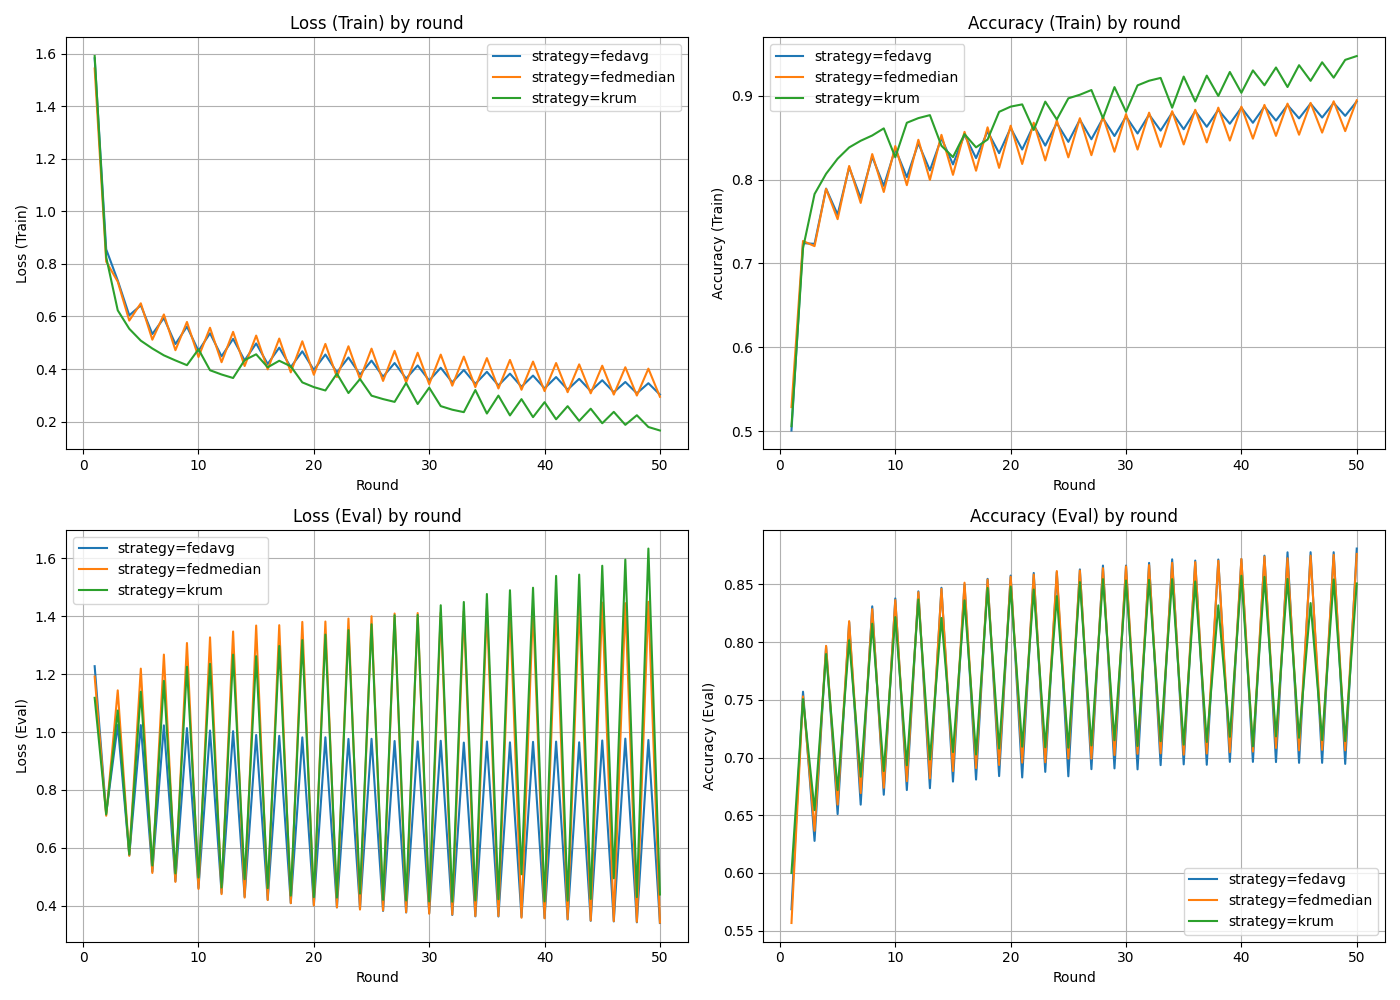

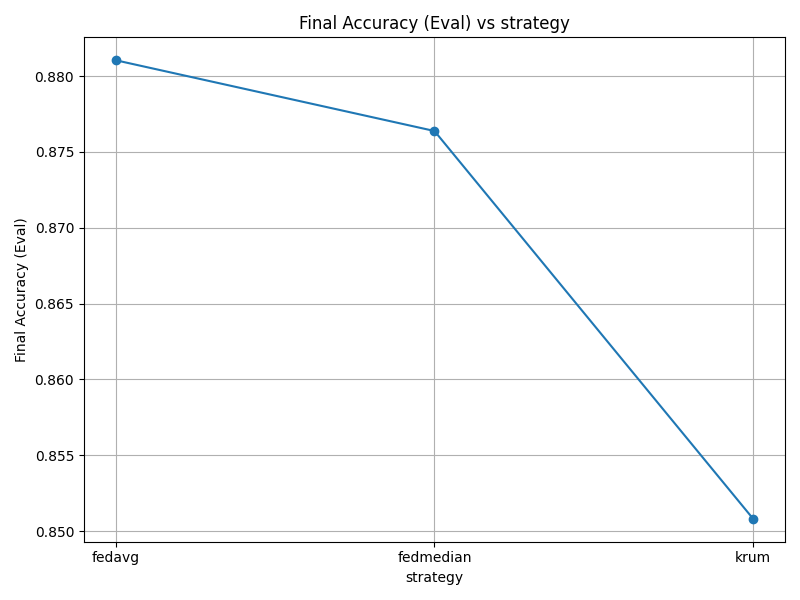

In [17]:
from IPython.display import Image, display

plot1_path = 'results_data_compare/plot1.png'
plot2_path = 'results_data_compare/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# Data poisoning compare for 50%

In [18]:
import os
import subprocess
import time
import shutil
import random

folder = "results_data_compare_50"


def run_experiment(strat_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for strat in strat_list:
        log_folder = os.path.join(folder, f"logs_{strat}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for strat ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", "10",
            "--type","data",
            "--strategy", strat,
            "--attackers", "0.5"
        ]
        server_log_path = os.path.join(log_folder, f"server_{strat}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        attacker_count = int(10 * 0.5)
        attacker_ids = set(random.sample(range(10), attacker_count))

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
            ]
            if cid in attacker_ids:
                print(f"Attacker")
                client_cmd+=["--type","data"]

            client_log_path = os.path.join(log_folder, f"client_{cid}_{strat}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {strat} ===\n")

strat_list = ["fedavg","fedmedian","krum"]
run_experiment(strat_list)


=== Running test for strat ===
Started server (PID 30125)
Started client 0 (PID 30151)
Attacker
Started client 1 (PID 30152)
Attacker
Started client 2 (PID 30153)
Attacker
Started client 3 (PID 30165)
Attacker
Started client 4 (PID 30166)
Started client 5 (PID 30198)
Started client 6 (PID 30210)
Started client 7 (PID 30228)
Attacker
Started client 8 (PID 30240)
Started client 9 (PID 30252)
=== Finished test for fedavg ===


=== Running test for strat ===
Started server (PID 32507)
Attacker
Started client 0 (PID 32530)
Started client 1 (PID 32531)
Started client 2 (PID 32534)
Started client 3 (PID 32550)
Attacker
Started client 4 (PID 32571)
Attacker
Started client 5 (PID 32583)
Started client 6 (PID 32595)
Attacker
Started client 7 (PID 32607)
Started client 8 (PID 32619)
Attacker
Started client 9 (PID 32620)
=== Finished test for fedmedian ===


=== Running test for strat ===
Started server (PID 34881)
Attacker
Started client 0 (PID 34910)
Started client 1 (PID 34911)
Started client 

In [19]:
! python vizualizer.py --folder results_data_compare_50 --param_index 2 --print_table

+-------+--------+-----------+------+-----------+--------------------+---------------------+
| alpha | client |  strategy | type | attackers |      accuracy      |         loss        |
+-------+--------+-----------+------+-----------+--------------------+---------------------+
|  10.0 |   10   |   fedavg  | data |    0.5    | 0.8715535193669305 | 0.35894612140925614 |
|  10.0 |   10   | fedmedian | data |    0.5    | 0.8775510204081632 |  0.340839850200012  |
|  10.0 |   10   |    krum   | data |    0.5    | 0.8188254893794252 |  0.5777996296139868 |
+-------+--------+-----------+------+-----------+--------------------+---------------------+
Saved metric curve plots to results_data_compare_50/plot1.png
Saved final accuracy vs param plot to results_data_compare_50/plot2.png


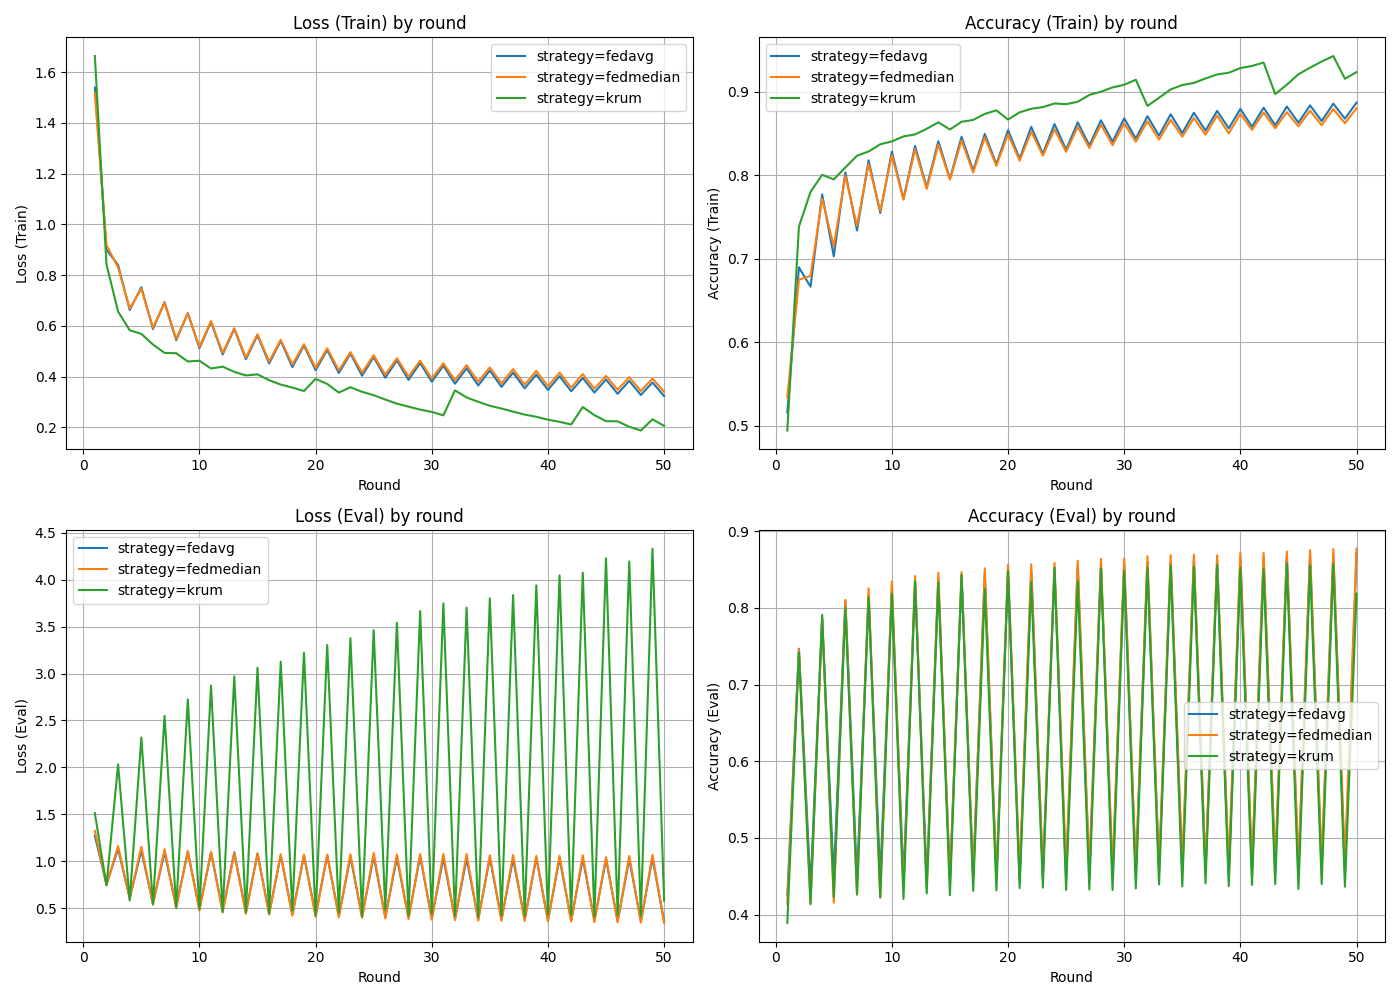

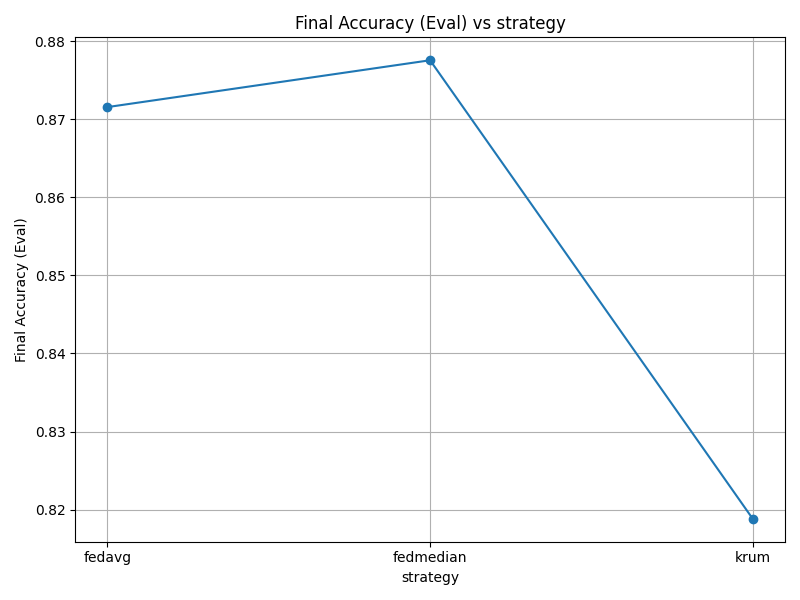

In [20]:
from IPython.display import Image, display

plot1_path = 'results_data_compare_50/plot1.png'
plot2_path = 'results_data_compare_50/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# FedAvg heterogeneity test

In [24]:
import os
import subprocess
import time
import shutil
import random

folder = "results_fedavg_alpha"


def run_experiment(alpha_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for a in alpha_list:
        log_folder = os.path.join(folder, f"logs_a{a}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {a} alpha ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", str(a),
            "--type","model",
            "--strategy", "fedavg",
            "--attackers", "0.25"
        ]
        server_log_path = os.path.join(log_folder, f"server_{a}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        attacker_count = int(10 * 0.25)
        attacker_ids = set(random.sample(range(10), attacker_count))

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
            ]
            if cid in attacker_ids:
                print(f"Attacker")
                client_cmd+=["--type","model"]

            client_log_path = os.path.join(log_folder, f"client_{cid}_a{a}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {a} alpha ===\n")

attack_list = [0.1,1,10]
run_experiment(attack_list)

Deleted existing folder: results_fedavg_alpha

=== Running test for 0.1 alpha ===
Started server (PID 63264)
Started client 0 (PID 63288)
Attacker
Started client 1 (PID 63294)
Started client 2 (PID 63295)
Started client 3 (PID 63296)
Started client 4 (PID 63308)
Started client 5 (PID 63320)
Started client 6 (PID 63341)
Started client 7 (PID 63353)
Attacker
Started client 8 (PID 63365)
Started client 9 (PID 63377)
=== Finished test for 0.1 alpha ===


=== Running test for 1 alpha ===
Started server (PID 65988)
Started client 0 (PID 66006)
Attacker
Started client 1 (PID 66011)
Started client 2 (PID 66019)
Started client 3 (PID 66020)
Started client 4 (PID 66032)
Started client 5 (PID 66044)
Started client 6 (PID 66045)
Started client 7 (PID 66077)
Attacker
Started client 8 (PID 66078)
Started client 9 (PID 66090)
=== Finished test for 1 alpha ===


=== Running test for 10 alpha ===
Started server (PID 68598)
Started client 0 (PID 68616)
Started client 1 (PID 68622)
Attacker
Started clien

In [28]:
! python vizualizer.py --folder results_fedavg_alpha --param_index 1 --print_table

+-------+--------+----------+-------+-----------+---------------------+------+
| alpha | client | strategy |  type | attackers |       accuracy      | loss |
+-------+--------+----------+-------+-----------+---------------------+------+
|  0.1  |   10   |  fedavg  | model |    0.25   | 0.09930023325558147 | nan  |
|  1.0  |   10   |  fedavg  | model |    0.25   | 0.09645980841316118 | nan  |
|  10.0 |   10   |  fedavg  | model |    0.25   | 0.09745939192003332 | nan  |
+-------+--------+----------+-------+-----------+---------------------+------+
Saved metric curve plots to results_fedavg_alpha/plot1.png
Saved final accuracy vs param plot to results_fedavg_alpha/plot2.png


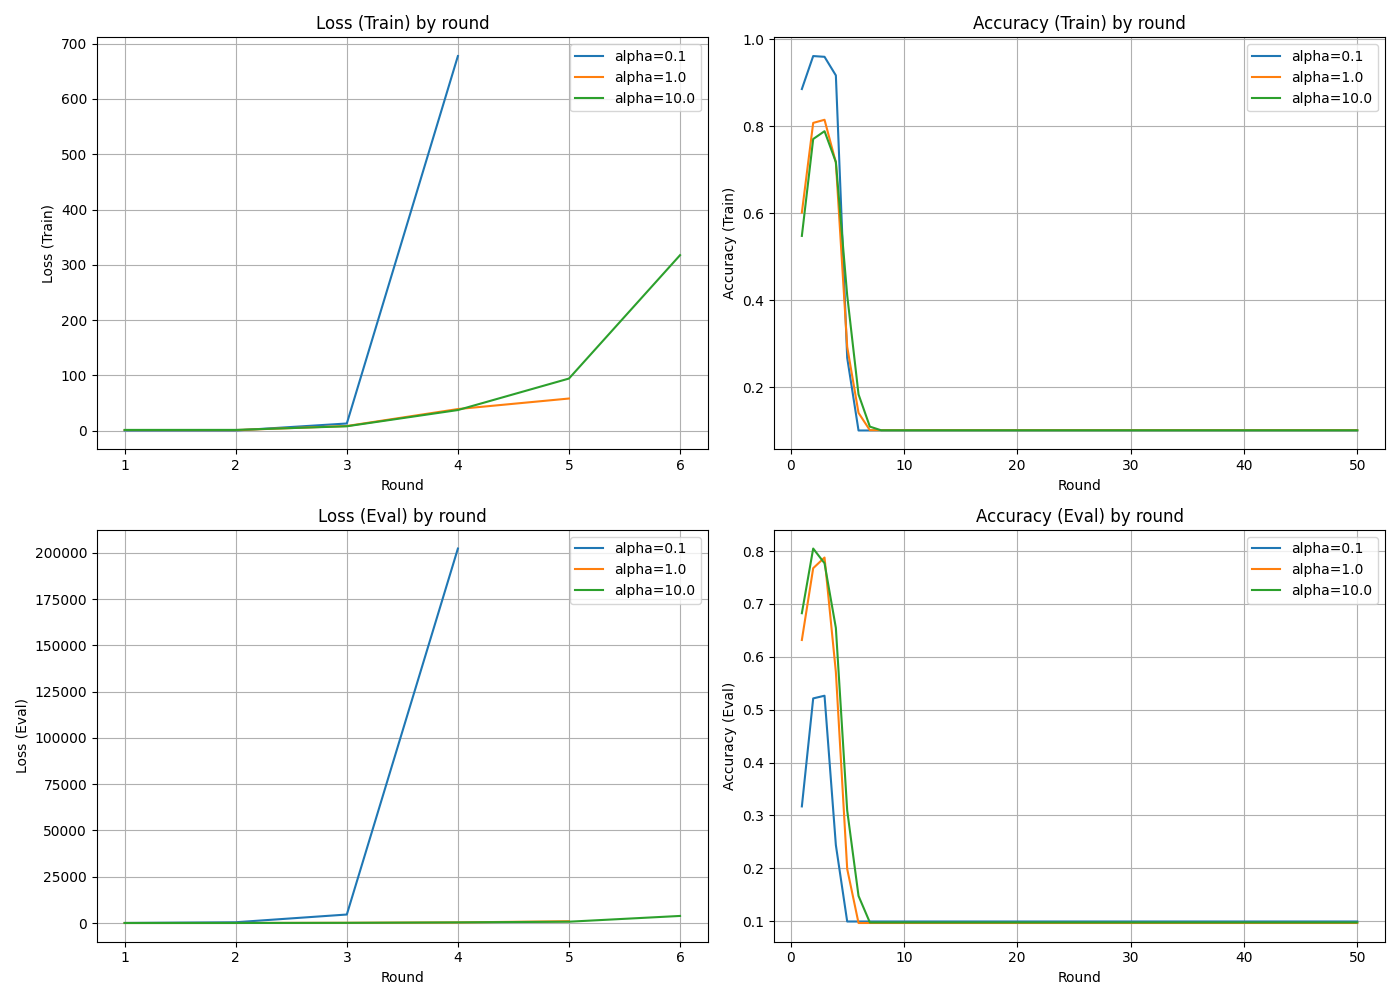

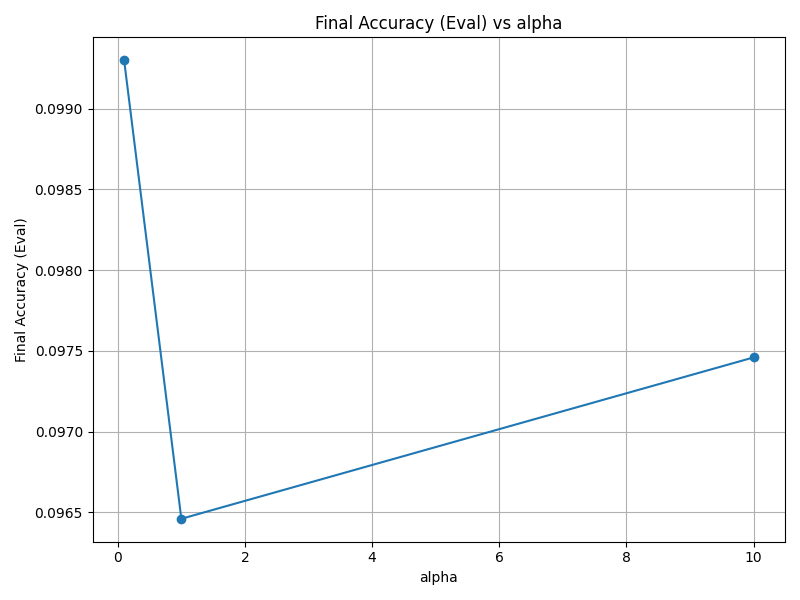

In [30]:
from IPython.display import Image, display

plot1_path = 'results_fedavg_alpha/plot1.png'
plot2_path = 'results_fedavg_alpha/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# FedMedian heterogeneity test

In [32]:
import os
import subprocess
import time
import shutil
import random

folder = "results_fedmedian_alpha"


def run_experiment(alpha_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for a in alpha_list:
        log_folder = os.path.join(folder, f"logs_a{a}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {a} alpha ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", str(a),
            "--type","model",
            "--strategy", "fedmedian",
            "--attackers", "0.25"
        ]
        server_log_path = os.path.join(log_folder, f"server_{a}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        attacker_count = int(10 * 0.25)
        attacker_ids = set(random.sample(range(10), attacker_count))

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
            ]
            if cid in attacker_ids:
                print(f"Attacker")
                client_cmd+=["--type","model"]

            client_log_path = os.path.join(log_folder, f"client_{cid}_a{a}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {a} alpha ===\n")

alpha_list = [0.1,1,10]
run_experiment(alpha_list)

Deleted existing folder: results_fedmedian_alpha

=== Running test for 0.1 alpha ===
Started server (PID 81259)
Started client 0 (PID 81277)
Started client 1 (PID 81283)
Started client 2 (PID 81284)
Attacker
Started client 3 (PID 81302)
Started client 4 (PID 81303)
Attacker
Started client 5 (PID 81318)
Started client 6 (PID 81330)
Started client 7 (PID 81342)
Started client 8 (PID 81343)
Started client 9 (PID 81361)
=== Finished test for 0.1 alpha ===


=== Running test for 1 alpha ===
Started server (PID 83983)
Started client 0 (PID 84003)
Started client 1 (PID 84004)
Attacker
Started client 2 (PID 84005)
Started client 3 (PID 84011)
Started client 4 (PID 84023)
Started client 5 (PID 84024)
Started client 6 (PID 84039)
Attacker
Started client 7 (PID 84054)
Started client 8 (PID 84055)
Started client 9 (PID 84069)
=== Finished test for 1 alpha ===


=== Running test for 10 alpha ===
Started server (PID 86581)
Started client 0 (PID 86602)
Attacker
Started client 1 (PID 86606)
Started cl

In [36]:
! python vizualizer.py --folder results_fedmedian_alpha --param_index 1 --print_table

+-------+--------+-----------+-------+-----------+--------------------+--------------------+
| alpha | client |  strategy |  type | attackers |      accuracy      |        loss        |
+-------+--------+-----------+-------+-----------+--------------------+--------------------+
|  0.1  |   10   | fedmedian | model |    0.25   | 0.7560813062312562 | 0.645378075906264  |
|  1.0  |   10   | fedmedian | model |    0.25   | 0.8763848396501458 | 0.343900516901052  |
|  10.0 |   10   | fedmedian | model |    0.25   | 0.8753852561432737 | 0.3468248257633052 |
+-------+--------+-----------+-------+-----------+--------------------+--------------------+
Saved metric curve plots to results_fedmedian_alpha/plot1.png
Saved final accuracy vs param plot to results_fedmedian_alpha/plot2.png


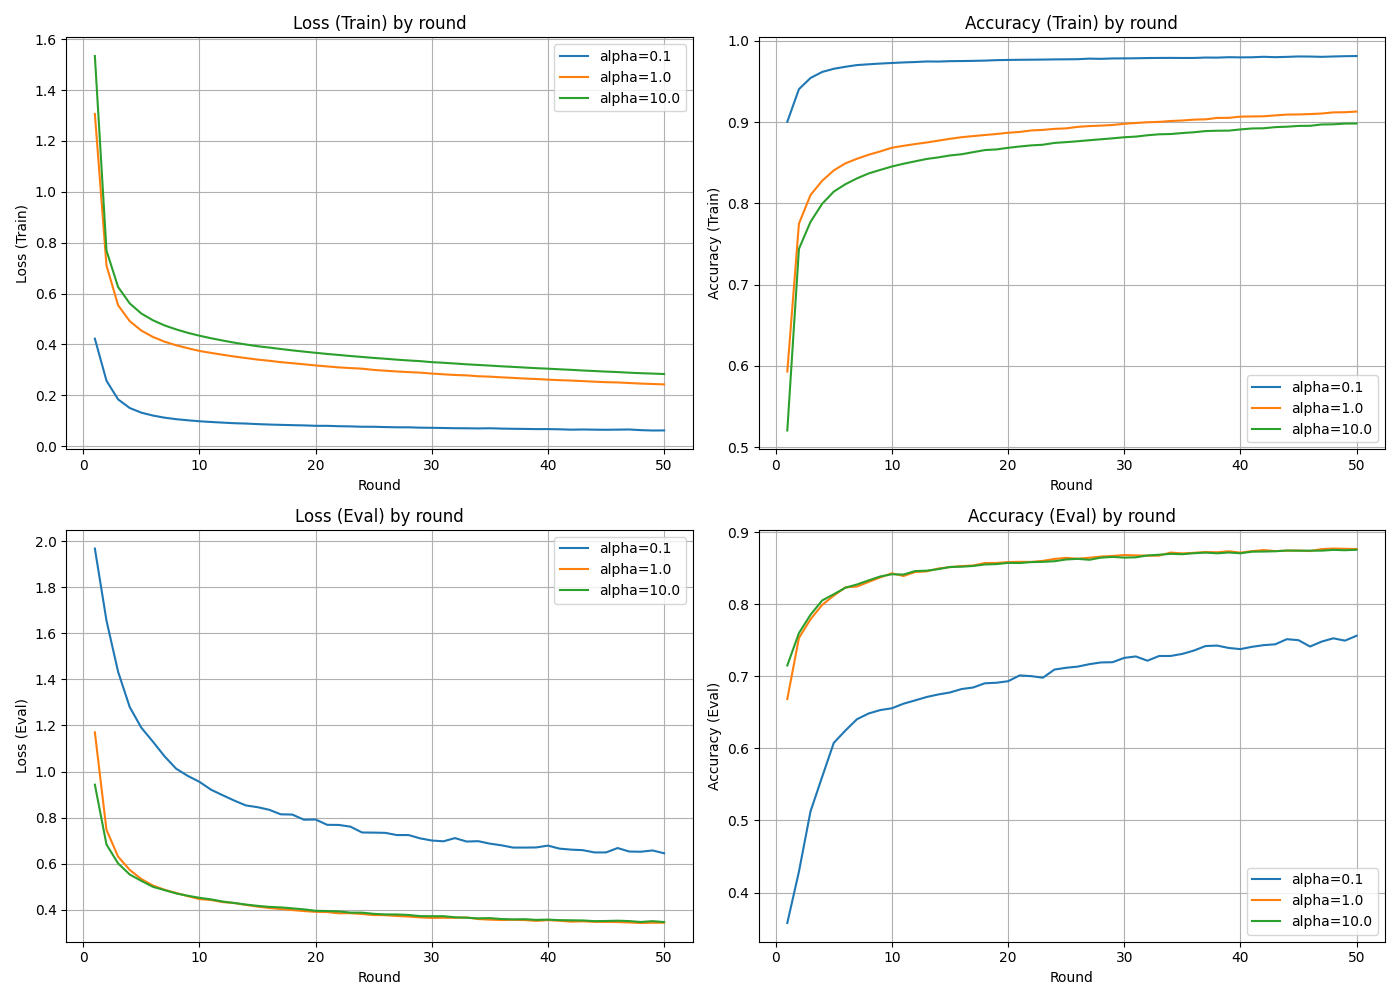

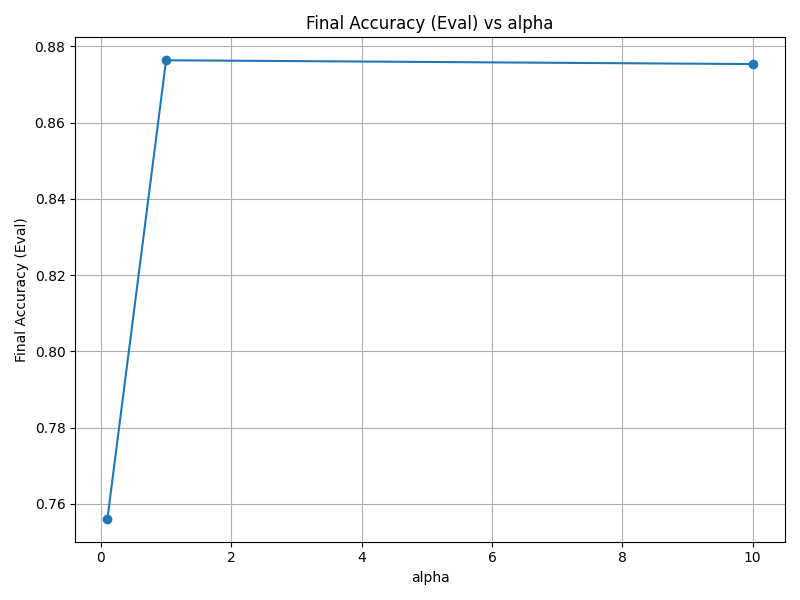

In [37]:
from IPython.display import Image, display

plot1_path = 'results_fedmedian_alpha/plot1.png'
plot2_path = 'results_fedmedian_alpha/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))

# Krum heterogeneity test

In [38]:
import os
import subprocess
import time
import shutil
import random

folder = "results_krum_alpha"


def run_experiment(alpha_list):

    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted existing folder: {folder}")

    os.makedirs(folder, exist_ok=True)
    

    for a in alpha_list:
        log_folder = os.path.join(folder, f"logs_a{a}")
        os.makedirs(log_folder, exist_ok=True)
        print(f"\n=== Running test for {a} alpha ===")

        server_cmd = [
            VENV_PYTHON, "run_server.py",
            "--rounds", "50",
            "--epochs", "3",
            "--clients", "10",
            "--output", folder,
            "--batch", "64",
            "--lr", "0.01",
            "--alpha", str(a),
            "--type","model",
            "--strategy", "krum",
            "--attackers", "0.25"
        ]
        server_log_path = os.path.join(log_folder, f"server_{a}.log")
        server_log = open(server_log_path, "w")
        server_proc = subprocess.Popen(server_cmd, stdout=server_log, stderr=subprocess.STDOUT)
        print(f"Started server (PID {server_proc.pid})")
        time.sleep(3)

        attacker_count = int(10 * 0.25)
        attacker_ids = set(random.sample(range(10), attacker_count))

        client_procs = []
        for cid in range(10):
            client_cmd = [
                VENV_PYTHON, "run_client.py",
                "--cid", str(cid),
                "--batch", "64",
            ]
            if cid in attacker_ids:
                print(f"Attacker")
                client_cmd+=["--type","model"]

            client_log_path = os.path.join(log_folder, f"client_{cid}_a{a}.log")
            client_log = open(client_log_path, "w")
            proc = subprocess.Popen(client_cmd, stdout=client_log, stderr=subprocess.STDOUT)
            client_procs.append((proc, client_log))
            print(f"Started client {cid} (PID {proc.pid})")
            time.sleep(0.2)

        for proc, log in client_procs:
            proc.wait()
            log.close()

        server_proc.terminate()
        server_proc.wait()
        server_log.close()

        print(f"=== Finished test for {a} alpha ===\n")

alpha_list = [0.1,1,10]
run_experiment(alpha_list)

Deleted existing folder: results_krum_alpha

=== Running test for 0.1 alpha ===
Started server (PID 89598)
Attacker
Started client 0 (PID 89616)
Started client 1 (PID 89622)
Started client 2 (PID 89623)
Started client 3 (PID 89627)
Started client 4 (PID 89642)
Attacker
Started client 5 (PID 89654)
Started client 6 (PID 89655)
Started client 7 (PID 89687)
Started client 8 (PID 89688)
Started client 9 (PID 89711)
=== Finished test for 0.1 alpha ===


=== Running test for 1 alpha ===
Started server (PID 92260)
Started client 0 (PID 92278)
Started client 1 (PID 92284)
Started client 2 (PID 92285)
Attacker
Started client 3 (PID 92286)
Attacker
Started client 4 (PID 92298)
Started client 5 (PID 92310)
Started client 6 (PID 92317)
Started client 7 (PID 92349)
Started client 8 (PID 92361)
Started client 9 (PID 92373)
=== Finished test for 1 alpha ===


=== Running test for 10 alpha ===
Started server (PID 94802)
Attacker
Started client 0 (PID 94825)
Started client 1 (PID 94826)
Started client 

In [39]:
! python vizualizer.py --folder results_krum_alpha --param_index 1 --print_table

+-------+--------+----------+-------+-----------+---------------------+---------------------+
| alpha | client | strategy |  type | attackers |       accuracy      |         loss        |
+-------+--------+----------+-------+-----------+---------------------+---------------------+
|  0.1  |   10   |   krum   | model |    0.25   | 0.28857047650783074 |  5.404337139561852  |
|  1.0  |   10   |   krum   | model |    0.25   |  0.8157434402332362 |  0.5748423562105474 |
|  10.0 |   10   |   krum   | model |    0.25   |  0.8483132028321533 | 0.47034026245582305 |
+-------+--------+----------+-------+-----------+---------------------+---------------------+
Saved metric curve plots to results_krum_alpha/plot1.png
Saved final accuracy vs param plot to results_krum_alpha/plot2.png


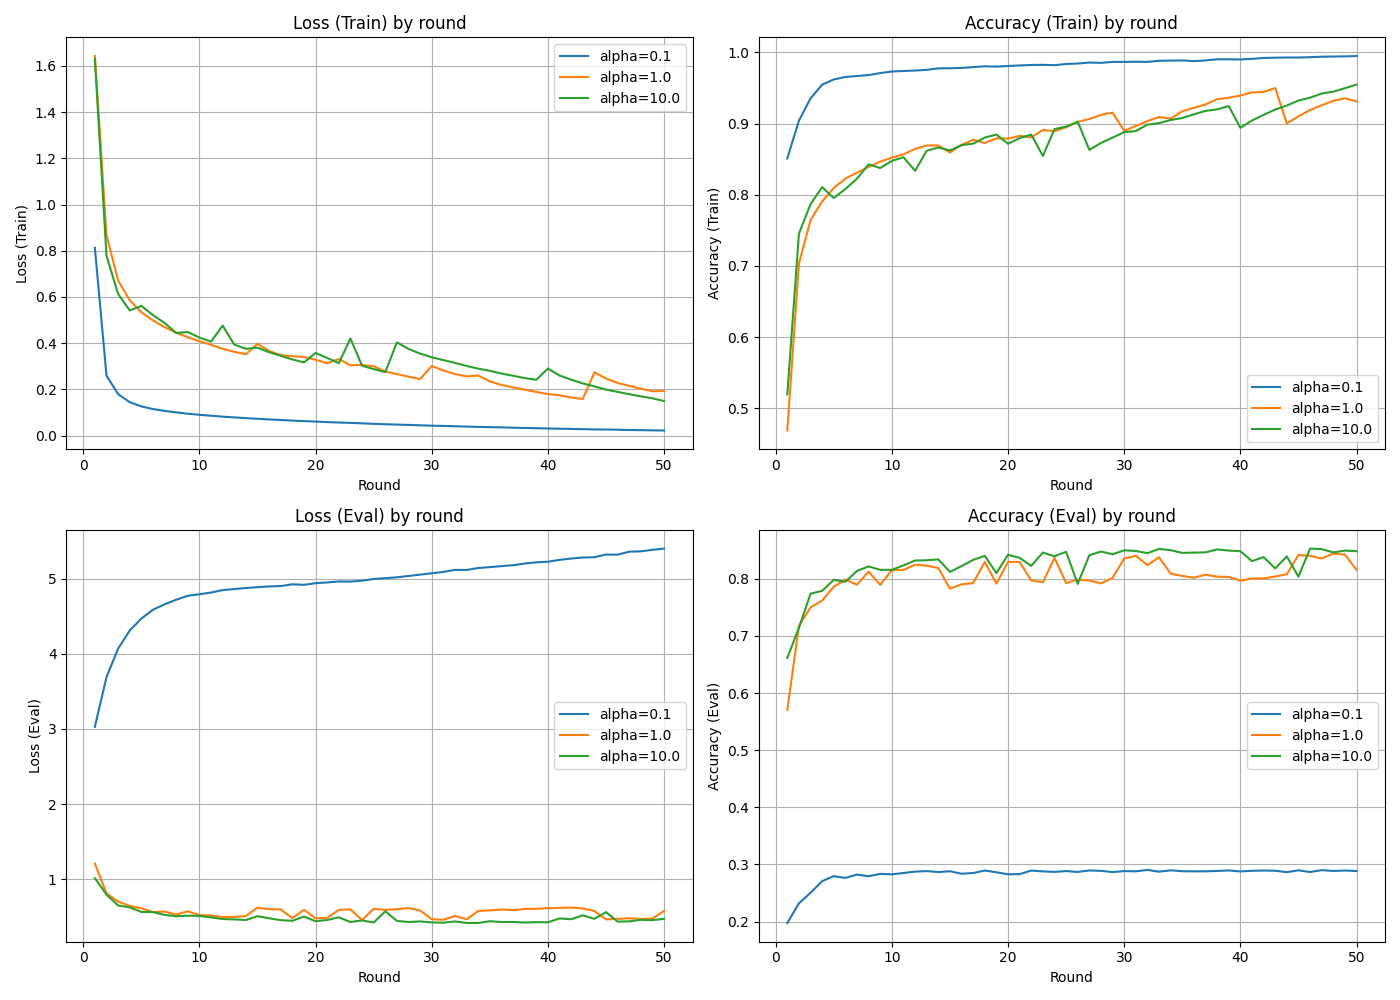

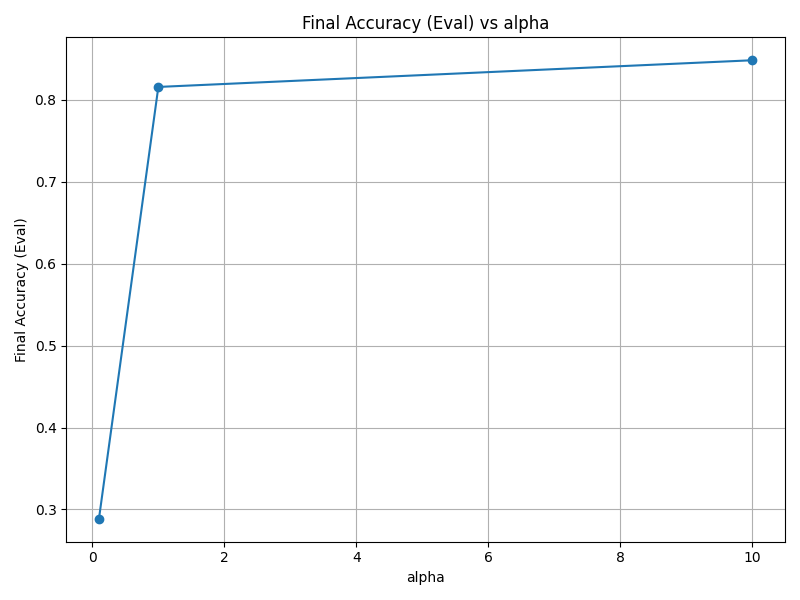

In [40]:
from IPython.display import Image, display

plot1_path = 'results_krum_alpha/plot1.png'
plot2_path = 'results_krum_alpha/plot2.png'

display(Image(filename=plot1_path))
display(Image(filename=plot2_path))